In [28]:
#librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
%load_ext kedro.ipython
context
catalog = context.catalog

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


[09/12/25 18:20:30] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=90794;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=949651;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

* cargar dataset

In [30]:
data_r2s_0 = catalog.load('data_r2s-0')


[09/12/25 18:20:31] INFO     Loading data from data_r2s-0 (CSVDataset)...                      ]8;id=757358;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=663301;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [51]:
data_r2s_0.head(5)

,dateid,platform,gamemode,mapname,matchid,roundnumber,objectivelocation,winrole,endroundreason,roundduration,...,primarygrip,primaryunderbarrel,primarybarrel,secondaryweapon,secondaryweapontype,secondarysight,secondarygrip,secondaryunderbarrel,secondarybarrel,secondarygadget
0,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,1,STRIP_CLUB,Defender,AttackersKilledHostage,124,...,Vertical,NaN,Compensator,5.7_USG,Pistols,NaN,NaN,NaN,NaN,IMPACT_GRENADE
1,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,4,CHURCH,Defender,AttackersEliminated,217,...,Vertical,Laser,Suppressor,P12,Pistols,NaN,NaN,Laser,Suppressor,DEPLOYABLE_SHIELD
2,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,3,CHURCH,Defender,AttackersEliminated,160,...,NaN,NaN,NaN,MK1_9mm,Pistols,NaN,NaN,NaN,NaN,DEPLOYABLE_SHIELD
3,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,4,CHURCH,Defender,AttackersEliminated,217,...,NaN,NaN,MuzzleBrake,PRB92,Pistols,NaN,NaN,NaN,NaN,IMPACT_GRENADE
4,20170212,PC,HOSTAGE,CLUB_HOUSE,1522380841,6,BEDROOM,Attacker,DefendersEliminated,143,...,Vertical,Laser,Suppressor,P12,Pistols,NaN,NaN,Laser,Suppressor,DEPLOYABLE_SHIELD


Cantidad de registros de datos y cantidad de columnas: (4000000, 31)


In [32]:
data_r2s_0.columns


Index(['dateid', 'platform', 'gamemode', 'mapname', 'matchid', 'roundnumber',
       'objectivelocation', 'winrole', 'endroundreason', 'roundduration',
       'clearancelevel', 'skillrank', 'role', 'team', 'haswon', 'operator',
       'nbkills', 'isdead', 'primaryweapon', 'primaryweapontype',
       'primarysight', 'primarygrip', 'primaryunderbarrel', 'primarybarrel',
       'secondaryweapon', 'secondaryweapontype', 'secondarysight',
       'secondarygrip', 'secondaryunderbarrel', 'secondarybarrel',
       'secondarygadget'],
      dtype='object')

In [52]:
egistros_columnas = data_r2s_0.shape
print("Cantidad de registros de datos y cantidad de columnas:", registros_columnas)

Cantidad de registros de datos y cantidad de columnas: (4000000, 31)


In [53]:

# observacion de 1 registro aleatorio utilizando sample() para identificar sus caracteristicas
data_r2s_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 31 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   dateid                int64 
 1   platform              object
 2   gamemode              object
 3   mapname               object
 4   matchid               int64 
 5   roundnumber           int64 
 6   objectivelocation     object
 7   winrole               object
 8   endroundreason        object
 9   roundduration         int64 
 10  clearancelevel        int64 
 11  skillrank             object
 12  role                  object
 13  team                  int64 
 14  haswon                int64 
 15  operator              object
 16  nbkills               int64 
 17  isdead                int64 
 18  primaryweapon         object
 19  primaryweapontype     object
 20  primarysight          object
 21  primarygrip           object
 22  primaryunderbarrel    object
 23  primarybarrel         object
 24

observacion general:

In [54]:
# Contando la cantidad de datos faltantes en cada columna
data_r2s_0.isna().sum()


dateid                        0
platform                      0
gamemode                      0
mapname                       0
matchid                       0
roundnumber                   0
objectivelocation             0
winrole                       0
endroundreason                0
roundduration                 0
clearancelevel                0
skillrank                     0
role                          0
team                          0
haswon                        0
operator                      0
nbkills                       0
isdead                        0
primaryweapon                 0
primaryweapontype             0
primarysight             322415
primarygrip             1226992
primaryunderbarrel      3374936
primarybarrel            747630
secondaryweapon               0
secondaryweapontype           0
secondarysight          3395796
secondarygrip           3765523
secondaryunderbarrel    3266431
secondarybarrel         2515458
secondarygadget               0
dtype: 

* datos duplicado

In [38]:
duplicate_rows_df = data_r2s_0[data_r2s_0.duplicated()]
print("número de filas duplicadas: ", duplicate_rows_df.shape)

número de filas duplicadas:  (125, 31)


valores nulos

In [48]:


# Identificando que columnas que contienen datos faltantes
data_r2s_0.columns[data_r2s_0.isnull().any()]


Index(['primarysight', 'primarygrip', 'primaryunderbarrel', 'primarybarrel',
       'secondarysight', 'secondarygrip', 'secondaryunderbarrel',
       'secondarybarrel'],
      dtype='object')

# Descripción de Datos

# Analisis estadístico

In [41]:
data_r2s_0.mapname.describe()


count     4000000
unique         16
top        CHALET
freq       259699
Name: mapname, dtype: object

In [42]:
data_r2s_0.mapname.mode()


0    CHALET
Name: mapname, dtype: object

In [43]:
data_r2s_0.operator.describe()



count        4000000
unique            35
top       GSG9-JAGER
freq          264157
Name: operator, dtype: object

In [44]:
data_r2s_0.operator.mode()


0    GSG9-JAGER
Name: operator, dtype: object

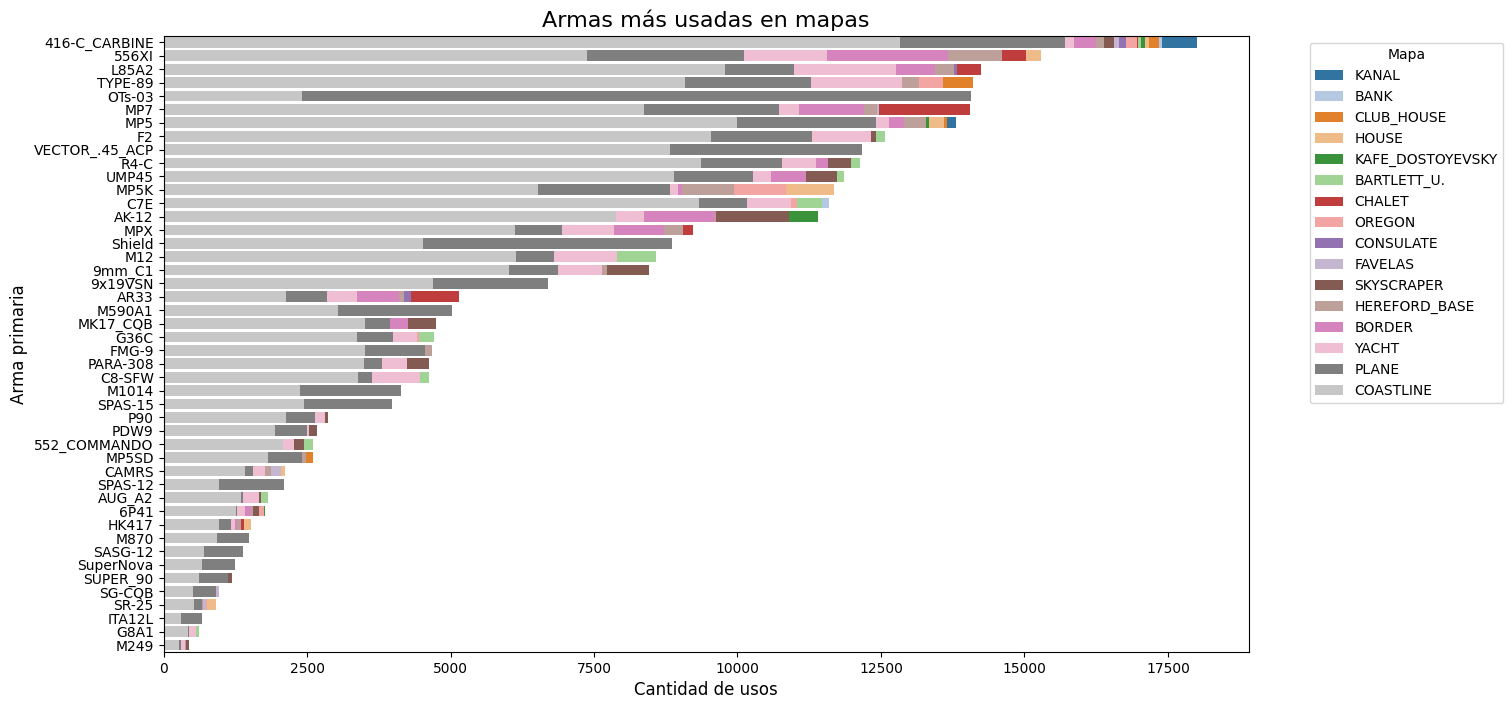

In [62]:
# Agrupar los datos por mapa y arma, y sumar el conteo
armas_por_mapa_agrupadas = armas_por_mapa.groupby(['mapname', 'primaryweapon'])['count'].sum().reset_index()

# Ordenar los datos por conteo descendente
armas_por_mapa_agrupadas = armas_por_mapa_agrupadas.sort_values(by='count', ascending=False)

# Crear el gráfico
plt.figure(figsize=(14, 8))
sns.barplot(data=armas_por_mapa_agrupadas, x='count', y='primaryweapon', hue='mapname', dodge=False, palette='tab20')
plt.title('Armas más usadas en mapas', fontsize=16)
plt.xlabel('Cantidad de usos', fontsize=12)
plt.ylabel('Arma primaria', fontsize=12)
plt.legend(title='Mapa', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Verificación de calidad de datos

[09/12/25 18:53:29] WARNING  C:\Users\droid\AppData\Local\Temp\ipykernel_8888\1780746597.py:6:      warnings.py:112
                             FutureWarning:                                                                        
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `y` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               sns.barplot(data=victorias_por_mapa, x='haswon', y='mapname',                       
                             palette='viridis')                                                                    
                                                                                                                   

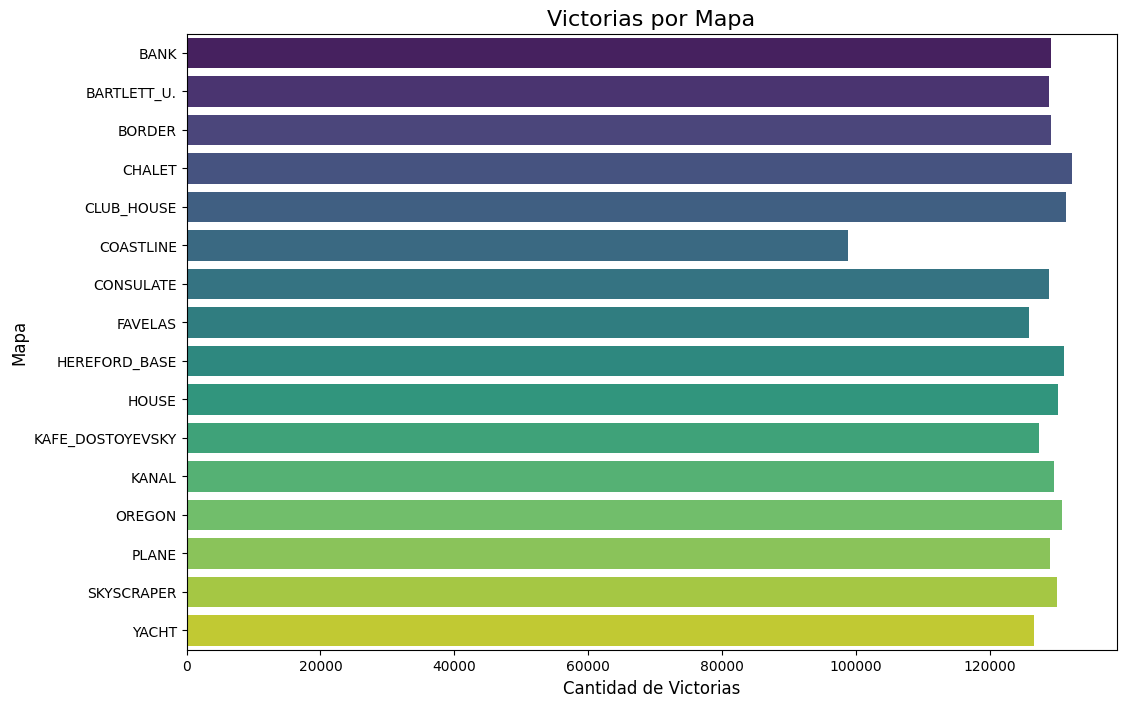

In [50]:
# Agrupar los datos por mapa y sumar las victorias
victorias_por_mapa = data_r2s_0.groupby('mapname')['haswon'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=victorias_por_mapa, x='haswon', y='mapname', palette='viridis')
plt.title('Victorias por Mapa', fontsize=16)
plt.xlabel('Cantidad de Victorias', fontsize=12)
plt.ylabel('Mapa', fontsize=12)
plt.show()

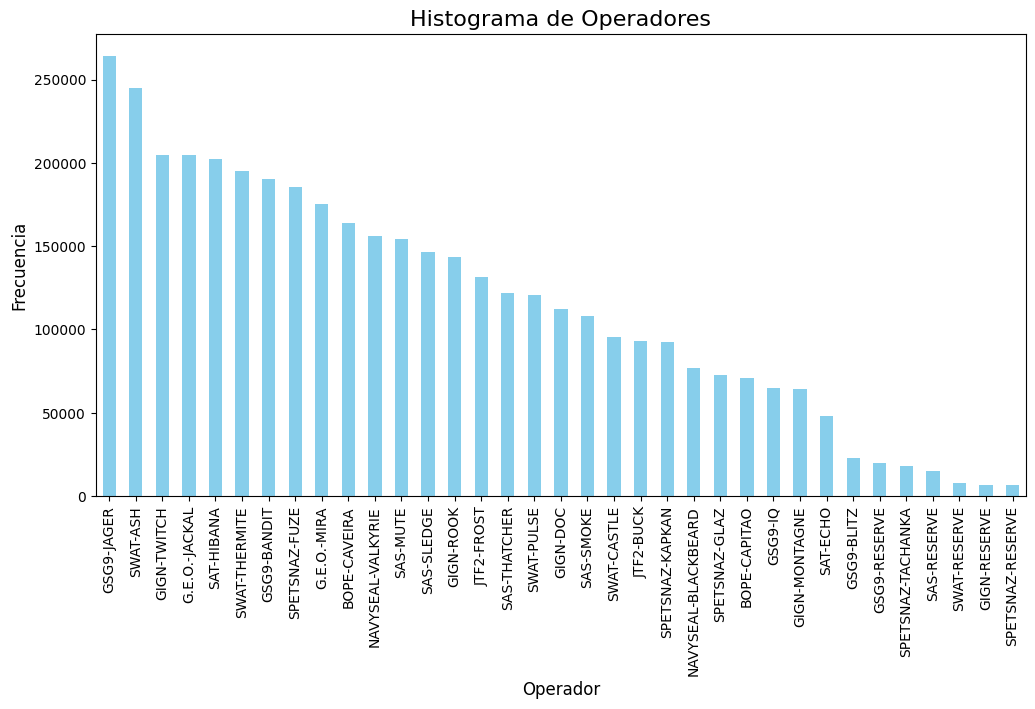

In [59]:
plt.figure(figsize=(12, 6))
data_r2s_0['operator'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Histograma de Operadores', fontsize=16)
plt.xlabel('Operador', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=90)
plt.show()